# 지하철 이용객 분석

- https://data.busan.go.kr/
- 승하차 인원정보 검색
- 일별역별시간대별승하차 파일 받기
- 최신 csv 파일로 받기</br>
  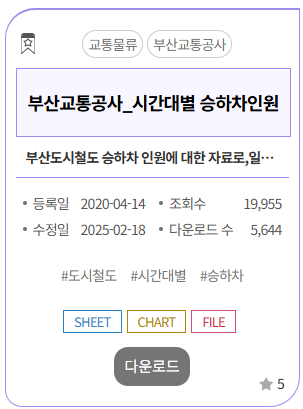

In [63]:
import pandas as pd
file_path = "./ref/일별역별시간대별승하차인원(2025년1월).csv"
df = pd.read_csv(file_path, encoding="EUC-KR")
df.head() # 맨 앞 데이터 5개 가져오기
# data.tail()

,역번호,역명,년월일,요일,구분,합계,01시-02시,02시-03시,03시-04시,04시-05시,...,15시-16시,16시-17시,17시-18시,18시-19시,19시-20시,20시-21시,21시-22시,22시-23시,23시-24시,24시-01시
0,95,다대포해수욕장,2025-01-01,수,승차,8126,0,1,0,14,...,527,498,517,266,170,98,79,38,10,0
1,95,다대포해수욕장,2025-01-01,수,하차,7674,0,1,0,0,...,376,357,295,185,132,81,74,50,71,46
2,95,다대포해수욕장,2025-01-02,목,승차,4893,1,0,0,21,...,472,364,373,210,159,87,90,57,13,0
3,95,다대포해수욕장,2025-01-02,목,하차,3965,1,4,0,1,...,311,339,296,321,239,143,99,92,82,49
4,95,다대포해수욕장,2025-01-03,금,승차,4572,0,0,0,27,...,401,300,363,237,139,102,70,69,13,0


In [64]:
columns = ['num','name','date','week','type','total']
time_col = [f"{i}~{i+1}H" for i in range(1,24)]
columns = columns + time_col + ['24~01H']
df.columns = columns
df = df.loc[:,:'total']

In [65]:
df.head()

,num,name,date,week,type,total
0,95,다대포해수욕장,2025-01-01,수,승차,8126
1,95,다대포해수욕장,2025-01-01,수,하차,7674
2,95,다대포해수욕장,2025-01-02,목,승차,4893
3,95,다대포해수욕장,2025-01-02,목,하차,3965
4,95,다대포해수욕장,2025-01-03,금,승차,4572


In [66]:
data = df.groupby(['num','name','date','week']).sum().reset_index()
# data[data['date']=='2025-01-01']
data

,num,name,date,week,type,total
0,95,다대포해수욕장,2025-01-01,수,승차하차,15800
1,95,다대포해수욕장,2025-01-02,목,승차하차,8858
2,95,다대포해수욕장,2025-01-03,금,승차하차,8279
3,95,다대포해수욕장,2025-01-04,토,승차하차,8477
4,95,다대포해수욕장,2025-01-05,일,승차하차,6912
...,...,...,...,...,...,...
3467,414,안평,2025-01-27,월,승차하차,2716
3468,414,안평,2025-01-28,화,승차하차,1987
3469,414,안평,2025-01-29,수,승차하차,1633
3470,414,안평,2025-01-30,목,승차하차,2037


In [68]:
gdata = data[['name','date','total']]
gdata = gdata.sort_values(by=['name','date'],ascending=[True,True])
gdata.head(10)

,name,date,total
1860,가야,2025-01-01,3953
1861,가야,2025-01-02,7242
1862,가야,2025-01-03,7293
1863,가야,2025-01-04,5609
1864,가야,2025-01-05,3945
1865,가야,2025-01-06,7469
1866,가야,2025-01-07,7217
1867,가야,2025-01-08,7324
1868,가야,2025-01-09,7110
1869,가야,2025-01-10,7052


In [69]:
mdata = gdata.groupby(by="name").sum().reset_index()
tdata = mdata[['name','total']]
tdata

,name,total
0,가야,194925
1,감전,211937
2,강서구청,140162
3,개금,442819
4,거제,313595
...,...,...
103,토성,436698
104,하단,1003733
105,해운대,803371
106,호포,67287


In [70]:
sdata = tdata.sort_values(by='total',ascending=False)
sdata.head(20)
total_data = sdata[:20]
total_data

,name,total
70,서면,3626209
83,연산,1500575
61,부산역,1337149
65,사상,1230792
36,동래,1089751
72,센텀시티,1083780
88,자갈치,1070458
23,남포,1045512
64,부전,1008329
104,하단,1003733


In [81]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

d2_path = "./ref/D2Coding-Ver1.3.2-20180524.ttf"
fm.fontManager.addfont(d2_path)
plt.rcParams["font.family"] = "D2Coding"

In [82]:
# for font in fm.findSystemFonts():
#     print(font)
# print(plt.rcParams["font.family"])

In [83]:
# !pip install squarify

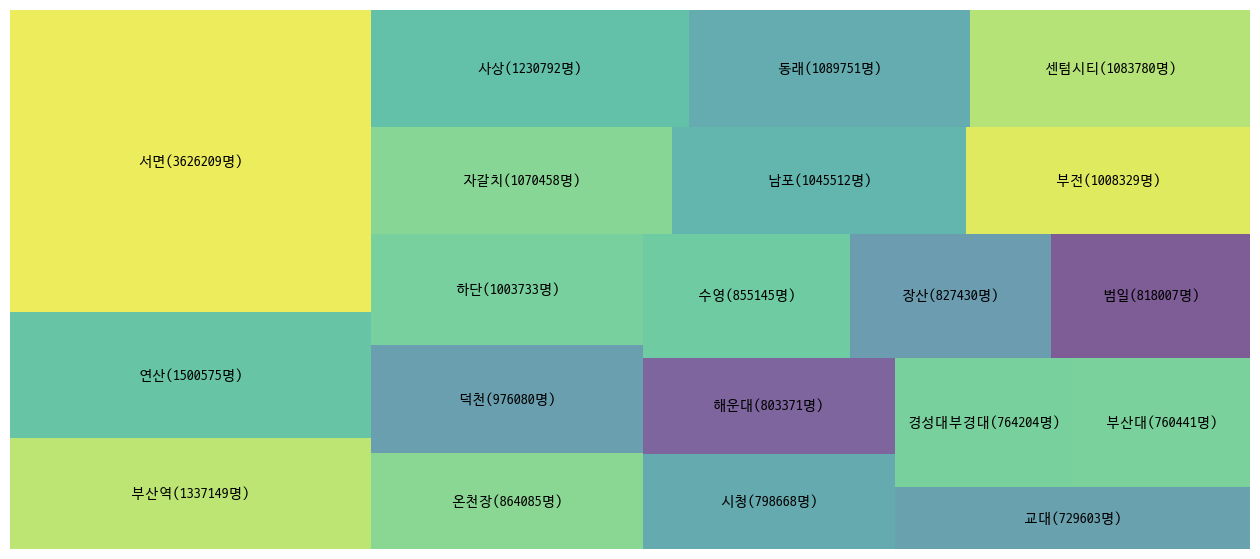

In [86]:
import squarify
plt.figure(figsize=(16,7))
squarify.plot(sizes=total_data['total'],label=[f"{x[0]}({x[1]}명)" for x in zip(total_data['name'],total_data['total'])],alpha=0.7)
plt.rcParams['font.size'] = 10 
# plt.rcParams['text.color']='blue'
# plt
plt.gca().invert_yaxis() # 축 뒤집기
plt.axis("off") # 축 인덱스 없애기
plt.show()

In [3]:
!pip install wordcloud

세종실록 권 세종 년 1월 햇무리 지다 황제 정조 하례 신하 하례 상왕 하례 햇무리 지다 경연 임 귀 년 곤장 때려 장 성현 객사 청 지기 정배 관의 입춘 하례식 정지 경연 일본 대마도 호가 토산물 상왕 인덕 궁 노 상왕 수주 태백 낮 경연 수 강궁 문안 도 지인 수령 구휼 상황 오도리 오랑 합의 지휘 등 조회 토산물 태백 낮 일 재상 말 전 공상 제사 빈객 접대 외 금주 진상 복용 기명 등 제외 금 은 사용 예조 고명 각도 관찰사 등 하례 윤허 강원도 원주 등지 기민 조세 면제 주니 변계량 이의 제기 마주 도 만호 등 토산물 마주 대관 종주 항복 왜인 고명 의식 절차 태백 낮 인일 하례 정지 정사 경연 수 강궁 문안 정사 경연 수 강궁 문안 상왕 변계량 하 황은 곡 창기 금 머리 금지 중국 진상 종마 년 전 제향 향 축문 동지사 이상 결석 윤회 대학 연 김점 마천목 말 인용 성보 수선 것 건의 수 강궁 문안 황색 색옷 단령 의 흉년 봄철 강 무 정지 충청도 관찰사 실농 관청 노비 신공 감면 면제 문소전 별 편전 정사 수 강궁 문안 궐내 읍 때 관원 사적 예 때 호 궤 것 의정부 육조 상왕 고명 것 경 창부 인수 부의 영사 실직 명 예비 직 명 두다 수 강궁 수리 상 번 선 군 인정전 신하 조회 중국 황제 법도 김점 것 허조 공방 수 강궁 문안 상왕 곽 존중 이종규 사신 고명 예식 문의 심온 종사관 우승 범 등 하옥 태백 낮 정사 경연 수 강궁 문안 영 접사 권 홍이 사신 말 고명 절차 변계량 등 박 신의 조충 좌 고발 죄 말라 태백 낮 수 강궁 문안 상왕 사은사 이원 부사 이숙 묘 전송 주문 사 박 신 위로 왜적 도망 김 득 등 월경 왜적 중국 침입 것 말 정사 수 강궁 문안 상왕 강화 근 청 파 노원 역 각급 관청 상수 태백 낮 정사 경연 수 강궁 문안 중국인 김 득 관의 진술 중국 것 인가 논의 골간 우지 합 지휘 랑 합 호가 토산물 햇무리 태백 낮 신하 조회 정사 경연 수 강궁 문안 금은 그릇 회수 가격 계산 상왕 처음 수 강궁 정문 의식 군사 조회 공

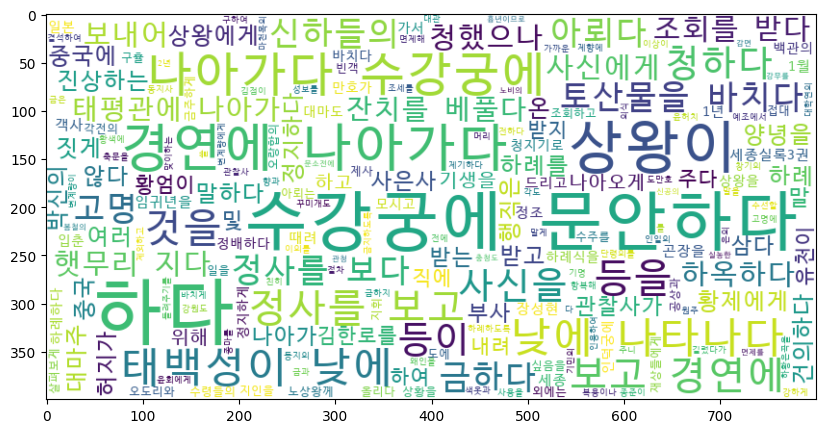

In [21]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import matplotlib.font_manager as fm
from konlpy.tag import Komoran # 명사만 분리하기

# 한글 폰트 설정
font_path = "./ref/D2Coding-Ver1.3.2-20180524.ttf"

# 샘플 테스트
text = """
세종실록3권, 세종 1년 1월
햇무리 지다
황제에게 정조 하례 드리고, 신하들의 하례 받고, 상왕에게 하례하다
햇무리 지다
경연에 나아가다
임귀년을 곤장을 때려 장성현 객사 청지기로 정배하다
백관의 입춘 하례식을 정지하게 하다
경연에 나아가다
일본 대마도 만호가 토산물을 바치다
상왕을 모시고 인덕궁에 가서 노상왕께 수주를 올리다
태백성이 낮에 나타나다
경연에 나아가다. 수강궁에 문안하다
여러 도에 지인을 보내어 수령들의 구휼 상황을 살펴보게 하다
오도리와 오랑합의 지휘 등이 조회하고 토산물을 바치다
태백성이 낮에 나타나다
일을 아뢰는 재상들에게 양녕을 보고 싶음을 말하다
각전의 공상과 제사, 빈객 접대 외에는 금주하게 하다
진상하는 복용이나 기명 등을 제외하고 금과 은의 사용을 금하다
예조에서 고명에 각도 관찰사 등이 하례하도록 청했으나 윤허치 않다
강원도 원주 등지의 기민의 조세를 면제해 주니, 변계량이 이의를 제기하다
대마주 도만호 등이 토산물을 바치다
대마주 대관 종준이 항복해 온 왜인을 돌려주기를 청하다
고명 맞이하는 의식 절차
태백성이 낮에 나타나다
인일의 하례를 정지하다
정사를 보고 경연에 나아가다
수강궁에 문안하다
정사를 보고 경연에 나아가다
수강궁에 문안하다
상왕이 변계량에게 하황은곡을 짓게 하다
창기의 금은 머리 꾸미개도 금지하도록 청했으나 금하지 말게 하다
중국에 진상하는 종마를 2년 전에 구하여 길렀다가 바치게 하다
제향에 쓸 향과 축문을 친히 전하다
동지사 이상이 다 결석하여 윤회에게 《대학연의》를 강하게 하다
김점이 마천목의 말을 인용하여 성보를 수선할 것을 건의하다
수강궁에 문안하다
황색에 가까운 색옷과 단령의를 금하다
흉년이므로 봄철의 강무를 정지하다
충청도 관찰사가 실농한 관청 노비의 신공의 감면 및 면제를 청하다
문소전에 나아가 별제를 행하고 편전에 나아가 정사를 보다
수강궁에 문안하다
궐내에서 읍할 때와 관원들이 사적인 예로 볼 때 호궤하는 것을 금하다
의정부와 육조에서 상왕이 고명을 받는 것이 옳다고 아뢰다
경창부와 인수부의 영사를 실직 5명, 예비직 5명을 두다
수강궁의 수리에 상번 선군을 부리기로 하다
인정전에서 신하들의 조회를 받다
중국 황제 법도를 따르라는 김점과 반드시 그럴 것은 없다고 허조가 공방하다
수강궁에 문안하다
상왕이 곽존중과 이종규를 사신에게 보내어 고명 맞는 예식을 문의케 하다
심온의 종사관 우승범 등을 하옥하다
태백성이 낮에 나타나다
정사를 보고 경연에 나아가다
수강궁에 문안하다
영접사 권홍이 사신이 말한 고명 받는 절차를 아뢰다
변계량 등이 박신의 조충좌를 고발하지 않은 죄를 청했으나 논하지 말라 하다
태백성이 낮에 나타나다
수강궁에 문안하다
상왕이 사은사 이원과 부사 이숙묘를 전송하고 주문사 박신을 위로하다
왜적에게서 도망해 온 김득관 등이 3월경에 왜적의 중국 침입이 있을 것을 말하다
정사를 보다
수강궁에 문안하다
상왕이 양녕을 강화가 아닌 양근에 두도록 명하다
청파와 노원 역의 각급 관청의 상수를 없애다
태백성이 낮에 나타나다
정사를 보고 경연에 나아가다
수강궁에 문안하다
중국인 김득관의 진술을 어떻게 중국에 알릴 것인가에 대한 논의
골간우지합 지휘와 올랑합 천호가 토산물을 바치다
햇무리가 지고 태백성이 낮에 나타나다
신하들의 조회를 받다
정사를 보고 경연에 나아가다
수강궁에 문안하다
금은으로 만든 그릇을 회수하고 그 가격을 계산해 주게 하다
상왕이 처음으로 수강궁 정문에서 의식대로 무관 및 군사의 조회를 받다
공신과 여러 군들이 사은사 경녕군에게 전별연을 베풀다
정사를 보고 경연에 나아가다
수강궁에 문안하다
개성 유후 이도분이 피휘하여 이름을 이사분으로 고치다
2품 이상의 행직은 좌목에 기록하고 3품 이하의 행직은 산관 반열을 따르게 하다
흉작을 풍작으로 꾸며 간평한 경차관 김습을 엄중히 다스리게 하다
유정현이 조정의 관원을 자주 바꾸지 말기를 건의하다
주홍색 비단으로 말 안장 꾸미는 것을 금하다
한확의 아우 한전을 의영고 승으로 삼다
정사를 보다. 허지가 김한로를 법에 의해 처치할 것을 아뢰다
경연에 나아가다
수강궁에 문안하다
현직에 있는 자의 관대도 산관의 것과 같게 하다
햇무리 지다
명나라 사신을 맞이하고 부절과 고서를 받다
황엄이 선유로 화자 40명과 종이 2만 장을 청구하다
고명 맞을 때에 황색 의장을 빼놓았다 하여 김영·김장·정인지를 하옥시키다
고명의 내용
사신을 문안하고 초구 등을 선사했는데 유천이 받지 않고 돌려보내다
상왕이 병조 판서 조말생에게 사신을 문안케 하다
중외 신하들의 하례를 받고 태평관에 나아가 잔치를 베풀다
노련한 역관인 오진에게 상왕이 백미와 콩을 내려 주다
김영을 직에 나아오게 하다
수강궁에 문안하다
좌대언 김익정에게 사신을 문안하게 하다
상왕이 태평관에 나아가 사신들에게 위로연을 베풀고 화포를 보여주니 놀라다
김장은 직에 나아오게 하고 정인지는 사제로 돌아가게 하다
수강궁에 문안하다
창덕궁에서 황제에게 올리는 표전에 배례하다.
사신에게 음식을 선사하려 했으나 유천은 받지 않다
상왕의 딸이 찬성 박신의 아들 박종우에게 출가하다
한확이 임금과 상왕에게 중국에서 선사받은 염소 20마리와 말 2필을 바치다
수강궁에 문안하다
상왕이 한확을 영접하고 하성절사 이지숭을 전별하다
상왕이 양녕 처소에 기생을 들인 이첩이란 자를 잡지 못한 이사맹을 하옥하다
한확에게 노비 10명과 밭 70결을 내려 주다
의정부에서 사신을 위해 잔치하다
허지가 김한로의 근일의 행태를 아뢰며 죄주기를 청하다
박종우를 자헌 대부 운성군으로, 정의 궁주의 딸을 정혜 옹주로 삼다
사역원 주부 조흡에게 김득관을 데리고 요동으로 달려가게 하다
황엄을 두려워해 선사품을 거절하던 유천이 비밀리에 초피 갖옷 등을 구하다
우의정의 아들을 은고리로 갓끈을 꾸몄다 하여 함부로 가둔 사헌부 서리들을 치죄하다
사헌부에서 김한로를 치죄하고 신맹화 삼형제를 충의위에서 빼기를 청하다
경연에 나아가다
수강궁에 문안하다
종친 부마들이 사신에게 잔치를 베풀다
양녕에게 기생을 통하게 하고 이첩을 놓친 광주 판목사 이배 등을 하옥하다
상왕이 경상도에 가례색 부사 최맹온 등을 보내어 처녀를 간선하게 하다
경상도 관찰사가 도망해오는 중국인의 처리를 위해 통역을 보내줄 것을 청하다
상왕이 양근군에 양녕이 살 집을 짓게 하다
수강궁에 문안하다
태평관에 나아가 잔치를 베풀다. 황엄이 화자는 20명만 되어도 좋다 하다
병조에서 군사 조회하는 의식을 정하여 아뢰다
정사를 보다
"""

# data = [t for t in text if bool(t.strip())]
# print(data)
komoran = Komoran()
nouns = komoran.nouns(text)
nouns_text = " ".join(nouns)
print(nouns_text)

#워드클라우드
wordcloud = WordCloud(font_path=font_path, width=800, height=400, background_color='white').generate(text)

# 시각화
plt.figure(figsize=(10,5))
plt.imshow(wordcloud,interpolation="bilinear")
plt.savefig("word1")
plt.show()

In [24]:
from collections import Counter
word_counts = Counter(nouns_text.split())
print(word_counts)

Counter({'문안': 21, '수': 20, '강궁': 20, '상왕': 18, '경연': 11, '등': 11, '정사': 10, '것': 10, '사신': 10, '태백': 7, '낮': 7, '고명': 7, '하례': 6, '말': 6, '조회': 5, '전': 5, '중국': 5, '명': 5, '직': 5, '김': 5, '햇무리': 4, '신하': 4, '토산물': 4, '하옥': 4, '죄': 4, '한확': 4, '선사': 4, '관': 4, '잔치': 4, '년': 3, '지다': 3, '황제': 3, '관의': 3, '정지': 3, '관찰사': 3, '변계량': 3, '의식': 3, '때': 3, '박': 3, '득': 3, '품': 3, '김한로': 3, '자': 3, '황엄': 3, '유': 3, '태평': 3, '권': 2, '장': 2, '청': 2, '호가': 2, '궁': 2, '도': 2, '지휘': 2, '일': 2, '진상': 2, '금': 2, '면제': 2, '마주': 2, '절차': 2, '하': 2, '이상': 2, '연': 2, '김점': 2, '건의': 2, '황색': 2, '관청': 2, '노비': 2, '관원': 2, '의정부': 2, '경': 2, '군': 2, '신의': 2, '사은사': 2, '부사': 2, '왜적': 2, '도망': 2, '역': 2, '중국인': 2, '합': 2, '군사': 2, '이사': 2, '행': 2, '허지': 2, '화자': 2, '김영': 2, '김장': 2, '정인지': 2, '천이': 2, '병조': 2, '정': 2, '딸': 2, '아들': 2, '박종우': 2, '기생': 2, '이첩': 2, '사헌부': 2, '치': 2, '경상도': 2, '세종실록': 1, '세종': 1, '1월': 1, '정조': 1, '임': 1, '귀': 1, '곤장': 1, '때려': 1, '성현': 1, '객사': 1, '지기': 1, '정배': 1, '입춘': 1, '하례식':